# Анализ рекламных данных
---
практический кейс

## Время и сводные таблицы

### Задачи.

Представьте, что вы устроились работать аналитиком в отдел рекламы, и ваша первая задача — помочь коллегам разобраться с некоторыми вопросами:

    Получить статистику по дням. Посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
    Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?
    Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех кликов объявлений к просмотрам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?
    Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?
    Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?
    Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена 200 рублей, то за один показ мы зарабатываем 200 / 1000.
    Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?
    А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?
    
### Описание колонок

    date — день, в который происходят события
    time — точное время события
    event — тип события, может быть или показ или клик по рекламе
    platform — платформа, на которой произошло рекламное событие
    ad_id — id рекламного объявления
    client_union_id — id рекламного клиента
    campaign_union_id — id рекламной кампании
    ad_cost_type — тип объявления с оплатой за клики (CPC) или за показы (CPM)
    ad_cost — стоимость объявления в рублях, для CPC объявлений — это цена за клик, для CPM — цена за 1000 показов
    has_video — есть ли у рекламного объявления видео
    target_audience_count — размер аудитории, на которую таргетируется объявление    
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
ads_data =pd.read_csv('ads_data.csv.zip', compression='zip')

In [3]:
ads_data.columns

Index(['ad_id', 'time', 'event', 'date', 'ad_cost_type', 'has_video',
       'client_union_id', 'campaign_union_id', 'platform', 'ad_cost',
       'target_audience_count', 'user_id'],
      dtype='object')

In [4]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')

In [5]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [6]:
ads_data.dtypes

ad_id                             int64
time                              int64
event                            object
date                     datetime64[ns]
ad_cost_type                     object
has_video                         int64
client_union_id                   int64
campaign_union_id                 int64
platform                         object
ad_cost                         float64
target_audience_count             int64
user_id                           int64
full_date                datetime64[ns]
dtype: object

Из full_date можем  посмотреть какой имесц, какой день и тд

In [7]:
ads_data.full_date.dt.month

0          4
1          4
2          4
3          4
4          4
          ..
3176709    4
3176710    4
3176711    4
3176712    4
3176713    4
Name: full_date, Length: 3176714, dtype: int64

In [8]:
ads_data.full_date.dt.year

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
3176709    2019
3176710    2019
3176711    2019
3176712    2019
3176713    2019
Name: full_date, Length: 3176714, dtype: int64

Или перевести в  дату без времени

In [9]:
ads_data.full_date.dt.date

0          2019-04-01
1          2019-04-01
2          2019-04-01
3          2019-04-01
4          2019-04-01
              ...    
3176709    2019-04-05
3176710    2019-04-05
3176711    2019-04-05
3176712    2019-04-05
3176713    2019-04-05
Name: full_date, Length: 3176714, dtype: object

 > **1.**   
 Получить статистику по дням. Посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.

> Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

In [10]:
ads_data.groupby(['date', 'event']) \
    .agg({'ad_id': 'count'}) 

ad_id
date       event         
2019-04-01 click      735
           view     34832
2019-04-02 click     1518
           view    145811
2019-04-03 click     1678
           view    214851
2019-04-04 click     1517
           view    126182
2019-04-05 click   501595
           view   1783288
2019-04-06 click    80420
           view    284287

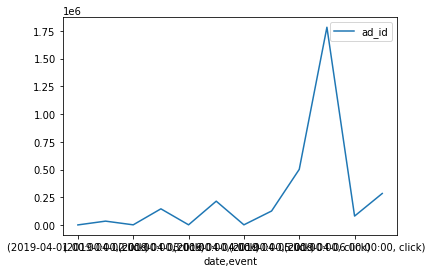

In [11]:
ads_data.groupby(['date', 'event']) \
    .agg({'ad_id': 'count'}).plot()

```pivot()``` изменяет данные так чтоб строки стали колонками 

In [12]:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index='date', columns = 'event', values='ad_id').reset_index() #reset_index() убираем мульти индексацию

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [13]:
# ??pd.pivot - можно сразу здесь посмотреть что это за функция

 > **число уникальных объявлений и уникальных кампаний по дням**

In [14]:
ads_data.groupby(['date', 'campaign_union_id'], as_index=False) \
    .agg({'event': 'count'}) \
    .pivot(index='date', columns = ['campaign_union_id'], values='event').reset_index().fillna(0)

campaign_union_id,date,1,2073,2119,2464,4382,4393,4452,7516,9071,...,121513,121541,121695,121779,121790,121941,121943,122042,122063,122086
0,2019-04-01,0.0,0.0,0.0,0.0,445.0,0.0,475.0,359.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-04-02,0.0,0.0,0.0,0.0,84.0,1780.0,108.0,77.0,0.0,...,0.0,227.0,266.0,0.0,0.0,0.0,1455.0,0.0,0.0,1732.0
2,2019-04-03,0.0,0.0,0.0,0.0,0.0,385.0,0.0,0.0,0.0,...,0.0,55.0,58.0,6384.0,0.0,546.0,282.0,0.0,213.0,317.0
3,2019-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,355.0,...,0.0,0.0,0.0,1184.0,708.0,95.0,0.0,0.0,48.0,0.0
4,2019-04-05,427.0,78.0,1246.0,383.0,0.0,0.0,0.0,0.0,93.0,...,516.0,0.0,0.0,0.0,137.0,0.0,0.0,135.0,0.0,0.0
5,2019-04-06,72.0,18.0,210.0,38.0,0.0,0.0,0.0,0.0,0.0,...,77.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0


In [15]:
ads_data.groupby(['date', 'ad_id'], as_index=False) \
    .agg({'event': 'count'}) \
    .pivot(index='date', columns = 'ad_id', values='event').reset_index().fillna(0)

ad_id,date,3,2132,2276,2475,2643,4585,4877,5028,7518,...,121513,121541,121695,121779,121790,121941,121943,122042,122063,122086
0,2019-04-01,0.0,0.0,0.0,0.0,0.0,445.0,0.0,475.0,359.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-04-02,0.0,0.0,0.0,0.0,0.0,84.0,1780.0,108.0,77.0,...,0.0,227.0,266.0,0.0,0.0,0.0,1455.0,0.0,0.0,1732.0
2,2019-04-03,0.0,0.0,0.0,0.0,0.0,0.0,385.0,0.0,0.0,...,0.0,55.0,58.0,6384.0,0.0,546.0,282.0,0.0,213.0,317.0
3,2019-04-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1184.0,708.0,95.0,0.0,0.0,48.0,0.0
4,2019-04-05,427.0,78.0,1246.0,122.0,261.0,0.0,0.0,0.0,0.0,...,516.0,0.0,0.0,0.0,137.0,0.0,0.0,135.0,0.0,0.0
5,2019-04-06,72.0,18.0,210.0,10.0,28.0,0.0,0.0,0.0,0.0,...,77.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0


 > **Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?**

Нужно разобраться в причине роста метрики

Возникает много ***гипотез***:

**1. например это какая нибудь черная пятница, когда все рекломадатели решили поставить рекламу, все кликают и тд**

**2. или например пришел какой то большой рекламодатель и только он стал крутить больше рекламы**

In [16]:
ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id', as_index=False) \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False)

,ad_id,time
108,112583,2166611
27,29927,27186
65,44635,8268
81,46583,7327
66,44956,5656
...,...,...
77,46433,17
17,21405,16
76,46024,16
112,113867,15


In [17]:
lider_ad_id = ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id', as_index=False) \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False).head(1).ad_id

In [18]:
lider_ad_id = lider_ad_id[0:]
lider_ad_id = 112583

Теперь посмотрим что происходило с этим id в другие дни

In [19]:
ads_data.query('ad_id == @lider_ad_id') \
    .groupby('date') \
    .agg({'time': 'count'})

,time
date,
2019-04-05,2166611
2019-04-06,348613


Посмотрим что это за клиент такой

In [20]:
ads_data.query('ad_id == @lider_ad_id').head(2)

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36
527125,112583,1554480636,click,2019-04-05,CPM,0,111818,112260,android,199.4,239408,6243,2019-04-05 16:10:36


Получается это один новый клиент, который оттянул на себя такое большое количесвто просмотров и кликов

---
---

 > **2.**   
 Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех кликов объявлений к просмотрам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?
Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?


In [21]:
click_view = ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index='date', columns='event', values='ad_id').reset_index()

In [22]:
click_view

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [23]:
click_view['ratio'] = ((click_view.click / click_view.view) * 100).round(2)

In [24]:
click_view

event,date,click,view,ratio
0,2019-04-01,735,34832,2.11
1,2019-04-02,1518,145811,1.04
2,2019-04-03,1678,214851,0.78
3,2019-04-04,1517,126182,1.20
4,2019-04-05,501595,1783288,28.13
5,2019-04-06,80420,284287,28.29


In [25]:
click_view_ad_id = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()

In [26]:
click_view_ad_id

event,ad_id,click,view
0,3,9.0,490.0
1,2132,1.0,95.0
2,2276,2.0,1454.0
3,2475,NaN,132.0
4,2643,3.0,286.0
...,...,...,...
350,121941,1.0,640.0
351,121943,15.0,1722.0
352,122042,1.0,155.0
353,122063,1.0,260.0


Делаем новый столбец по другому, подходит когда делаем два столбца за раз или более

In [27]:
click_view_ad_id = click_view_ad_id.assign(ctr = click_view_ad_id.click / click_view_ad_id.view, 
                                           ctr_per = ((click_view_ad_id.click / click_view_ad_id.view)*100).round(2))

In [28]:
click_view_ad_id.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,30.00
324,119450,258.0,1254.0,0.205742,20.57
125,38575,43.0,257.0,0.167315,16.73
144,40968,29.0,217.0,0.133641,13.36
207,45642,42.0,344.0,0.122093,12.21
283,110924,11.0,95.0,0.115789,11.58
194,45043,28.0,245.0,0.114286,11.43
96,35034,112.0,997.0,0.112337,11.23
5,4585,53.0,476.0,0.111345,11.13
328,120347,236.0,2168.0,0.108856,10.89


In [29]:
click_view_ad_id.ctr.median()

0.010753240746688594

In [30]:
click_view_ad_id.ctr.mean()

0.020628096080757954

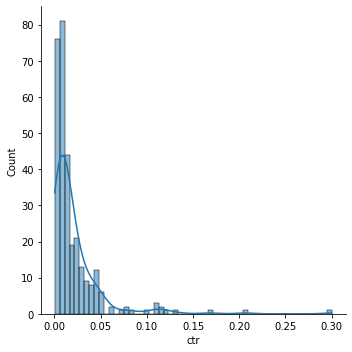

In [31]:
sns.displot(click_view_ad_id.ctr, kde=True)

***Медиана*** лучше характерезует наши ctr так раз отражает более реальную картинуб чем среднее арифметическое.

In [32]:
data = click_view_ad_id.fillna(0)

In [33]:
ad_id_bug = data.query('click == 0').ad_id

In [34]:
#только те события, которые были у нас в списке багованных ad_id_bug
ads_data[ads_data.ad_id.isin(ad_id_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id':'count'}) \
    .sort_values('ad_id', ascending=False)

,platform,ad_id
0,android,4906
1,ios,3075
2,web,1988


In [35]:
ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id':'count'}) \
    .sort_values('ad_id', ascending=False)

,platform,ad_id
0,android,1588211
1,ios,953078
2,web,635425


---
---

 > **3.**   
 Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?


Создадим датафрейм со всеми данными но включая CTR

In [36]:
ads_data_ctr = ads_data.merge(data, on='ad_id', how='left')

Проверим Нет ли потерянных данных в ctr?

In [37]:
ads_data_ctr.ctr_per.unique()

array([ 0.89,  1.7 ,  4.81, 11.13,  0.2 ,  1.31,  0.18,  2.02,  1.14,
        0.68,  0.75,  2.46,  0.29, 16.73,  1.76,  0.  ,  0.69,  1.71,
        0.73,  2.35,  4.92,  0.91,  0.84,  5.32,  1.59,  0.35,  2.55,
        2.65,  4.79,  0.82,  0.41,  1.9 ,  2.93, 11.43,  3.25,  8.33,
        1.97,  0.13,  0.59,  0.17,  1.66,  0.37,  0.62,  0.97,  0.31,
        2.08,  0.3 ,  0.09,  1.02,  1.41,  0.38,  4.27,  2.99,  2.5 ,
        0.1 ,  0.76,  0.52,  4.45,  2.73,  1.48,  1.53,  1.47,  1.12,
        0.66,  3.14,  0.55,  0.19,  1.43,  2.61,  0.23,  0.9 ,  2.69,
        0.87,  1.19,  4.31,  3.65,  0.34,  0.83,  1.61,  0.26,  3.48,
        4.58,  0.88,  2.33,  4.47,  0.99,  1.22,  0.44,  7.55,  4.8 ,
        2.92,  1.04,  6.03,  0.28,  0.43,  2.81,  0.74,  1.01,  4.17,
        1.56,  0.65,  1.23,  4.46,  0.7 ,  9.73,  1.68,  0.11,  2.91,
        0.92,  6.28,  3.45,  0.47,  1.57,  0.95,  1.07,  1.06, 12.21,
        0.05,  0.6 ,  0.64,  3.7 ,  2.38,  0.16,  3.98,  1.11,  4.03,
        1.92,  0.48,

In [38]:
ads_data_ctr.groupby('has_video', as_index=False) \
    .agg({'ctr_per': 'mean'}) \
    .sort_values('ctr_per', ascending=False)

,has_video,ctr_per
0,0,24.026980
1,1,0.268201


In [39]:
ads_data_ctr.groupby('has_video', as_index=False) \
    .agg({'ctr_per': 'median'}) \
    .sort_values('ctr_per', ascending=False)

,has_video,ctr_per
0,0,30.00
1,1,0.17


In [40]:
ads_data_ctr.groupby('has_video', as_index=False) \
    .agg({'ctr_per': 'std'}) \
    .sort_values('ctr_per', ascending=False)

,has_video,ctr_per
0,0,11.739180
1,1,0.256922


Есть ли различия в CTR у объявлений с видео и без? 

**Да, у объявлений без видео CTR намного выше**

А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [41]:
df_04_04_2019 = ads_data.query('date == "2019-04-04"') \
    .groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)

df_04_04_2019['ctr'] = df_04_04_2019.click / df_04_04_2019.view
df_04_04_2019

event,ad_id,click,view,ctr
0,9071,3.0,352.0,0.008523
1,9776,37.0,1115.0,0.033184
2,10601,3.0,848.0,0.003538
3,11887,151.0,8720.0,0.017317
4,12137,1.0,170.0,0.005882
...,...,...,...,...
145,120790,0.0,19.0,0.000000
146,121779,68.0,1116.0,0.060932
147,121790,7.0,701.0,0.009986
148,121941,0.0,95.0,0.000000


In [42]:
df_95 = df_04_04_2019.query('click > 0').describe(percentiles=[.95])
df_95

event,ad_id,click,view,ctr
count,109.000000,109.000000,109.000000,109.000000
mean,61752.256881,13.917431,1127.431193,0.025617
std,39125.806095,33.256057,2473.741062,0.033548
min,9071.000000,1.000000,18.000000,0.000534
50%,45436.000000,3.000000,337.000000,0.012658
95%,120433.400000,59.800000,4036.200000,0.102115
max,121790.000000,217.000000,18158.000000,0.209056


In [43]:
# for index, row in df_95.iterrows():
#     print(index[4],row[3])
    
df_95_perc = df_95['ctr'][5]

То же смое проще

In [44]:
df_04_04_2019.query('click > 0').ctr.quantile(q=0.95)

0.10211538461538454

---

In [45]:
'95й процентиль CTR по всем объявлениям за 2019-04-04 равен {} или {}%'.format(df_95_perc, (100*df_95_perc).round(2))


'95й процентиль CTR по всем объявлениям за 2019-04-04 равен 0.10211538461538454 или 10.21%'

---

 >**4.**
 
  > Для финансового отчета нужно рассчитать наш заработок по дням. 
  > В какой день мы заработали больше всего? В какой меньше? 
  >Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена 200 рублей, то за один показ мы зарабатываем ```200 / 1000```.

In [46]:
ads_data.query('(ad_cost_type == "CPC") & (event == "click")')  #отобрали только клики в CPC

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
248,4585,1554135960,click,2019-04-01,CPC,0,37,4382,android,53.5,327648,538,2019-04-01 16:26:00
880,120444,1554136218,click,2019-04-01,CPC,0,120413,120440,android,52.0,4667,874,2019-04-01 16:30:18
1011,38110,1554136457,click,2019-04-01,CPC,0,23359,38110,android,54.1,4181,239,2019-04-01 16:34:17
1569,38575,1554133580,click,2019-04-01,CPC,0,23533,38575,android,44.8,21831,1016,2019-04-01 15:46:20
1950,38575,1554134271,click,2019-04-01,CPC,0,23533,38575,ios,44.8,21831,980,2019-04-01 15:57:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919449,19940,1554507113,click,2019-04-06,CPC,0,2016,19939,android,54.9,24781,6614,2019-04-05 23:31:53
2951415,113878,1554506129,click,2019-04-06,CPC,0,113785,113878,ios,46.3,5473,8335,2019-04-05 23:15:29
2968612,26263,1554505928,click,2019-04-06,CPC,0,14710,26263,ios,47.0,10912,2382,2019-04-05 23:12:08
2991470,3,1554506714,click,2019-04-06,CPC,0,1,1,ios,52.4,52875,413,2019-04-05 23:25:14


Заработок по дням из ```ad_cost_type == "CPC"```

In [47]:
ads_data.query('(ad_cost_type == "CPC") & (event == "")') \
    .groupby('date', as_index=False) \
    .agg({'ad_cost': 'sum'})

,date,ad_cost


А сколько заработали

In [48]:
cost_CPC = ads_data.query('(ad_cost_type == "CPC") & (event == "click")').ad_cost.sum()
cost_CPC

84810.0

In [49]:
'Всего на объявлениях с типом оплаты CPC компания заработала {} рублей'.format(cost_CPC)

'Всего на объявлениях с типом оплаты CPC компания заработала 84810.0 рублей'

In [50]:
ads_data.query('(ad_cost_type == "CPM") & (event == "view")') \
    .groupby('date', as_index=False) \
    .agg({'ad_cost': 'sum'})

,date,ad_cost
0,2019-04-01,6.122812e+06
1,2019-04-02,2.617331e+07
2,2019-04-03,3.461232e+07
3,2019-04-04,1.941636e+07
4,2019-04-05,3.541785e+08
5,2019-04-06,5.658734e+07


In [51]:
cost_CPM = ads_data.query('(ad_cost_type == "CPM") & (event == "view")').ad_cost.sum() / 1000
cost_CPM

497090.6778000003

In [52]:
'Всего на объявлениях с типом оплаты CPM компания заработала {} рублей'.format(cost_CPM.round(2))

'Всего на объявлениях с типом оплаты CPM компания заработала 497090.68 рублей'

In [53]:
'Сумма за все платные действия - {} рублей'.format((cost_CPM + cost_CPC).round(2))

'Сумма за все платные действия - 581900.68 рублей'

**Весь общий заработок по дням**

In [54]:
CPC = ads_data.query('(ad_cost_type == "CPC") & (event == "click")') \
    .groupby('date', as_index=False) \
    .agg({'ad_cost': 'sum'})

CPC = CPC.rename({'ad_cost': 'ad_cost_CPC'}, axis=1)
CPC

,date,ad_cost_CPC
0,2019-04-01,7036.9
1,2019-04-02,7663.7
2,2019-04-03,38597.2
3,2019-04-04,26878.0
4,2019-04-05,4381.2
5,2019-04-06,253.0


In [55]:
CPM_1000 = ads_data.query('(ad_cost_type == "CPM") & (event == "view")') \
    .groupby('date', as_index=False) \
    .agg({'ad_cost': 'sum'})
# это еще без деления на 100

In [56]:
CPM_1000['ad_cost_1000'] = (CPM_1000.ad_cost / 1000).round(2)
CPM_1000

,date,ad_cost,ad_cost_1000
0,2019-04-01,6.122812e+06,6122.81
1,2019-04-02,2.617331e+07,26173.31
2,2019-04-03,3.461232e+07,34612.32
3,2019-04-04,1.941636e+07,19416.36
4,2019-04-05,3.541785e+08,354178.55
5,2019-04-06,5.658734e+07,56587.34


In [57]:
CPM = CPM_1000.drop('ad_cost', axis=1).rename({'ad_cost_1000': 'ad_cost'}, axis=1)

In [58]:
CPM = CPM.rename({'ad_cost': 'ad_cost_CPM'}, axis=1)
CPM

,date,ad_cost_CPM
0,2019-04-01,6122.81
1,2019-04-02,26173.31
2,2019-04-03,34612.32
3,2019-04-04,19416.36
4,2019-04-05,354178.55
5,2019-04-06,56587.34


In [59]:
data_cost_day = CPC.merge(CPM, on='date')
data_cost_day['total_cost'] = data_cost_day.ad_cost_CPC + data_cost_day.ad_cost_CPM
data_cost_day.sort_values('total_cost', ascending=False)

,date,ad_cost_CPC,ad_cost_CPM,total_cost
4,2019-04-05,4381.2,354178.55,358559.75
2,2019-04-03,38597.2,34612.32,73209.52
5,2019-04-06,253.0,56587.34,56840.34
3,2019-04-04,26878.0,19416.36,46294.36
1,2019-04-02,7663.7,26173.31,33837.01
0,2019-04-01,7036.9,6122.81,13159.71


In [60]:
max_cost = data_cost_day.total_cost.max()
max_cost

358559.75

In [61]:
min_cost = data_cost_day.total_cost.min()
min_cost

13159.710000000003

In [62]:
max_cost_day = (data_cost_day.sort_values('total_cost', ascending=False)).head(1).date

In [63]:
max_cost_day

4   2019-04-05
Name: date, dtype: datetime64[ns]

In [64]:
max_cost_day_2 = data_cost_day.set_index('date').head(1).index.to_list
l = []
l.append(max_cost_day_2)
max_cost_day_2


<bound method IndexOpsMixin.tolist of DatetimeIndex(['2019-04-01'], dtype='datetime64[ns]', name='date', freq=None)>

In [65]:
'Максимально на объявлениях компания заработала {} рублей 1 апреля 2019'.format(max_cost)

'Максимально на объявлениях компания заработала 358559.75 рублей 1 апреля 2019'

---

 > **5.**
 Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?
А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

Начнем с 

 А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?
 

Для этого сгруппируем данные по 'ad_id' и 'event', и найдем минимальное время, т е время которое было раньше, так мы для каждого из ad_id посчитаем минимальное время показа и минимальное время клика и отберем те события где время клика оказалось раньше времени просмотра

In [69]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .query('click < view')

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


Это мы получили, объявления с которыми у нас есть проблемы

In [70]:
ads_data[ads_data.ad_id == 16548].sort_values('time')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58


А теперь

 Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

In [72]:
ads_data.groupby('platform') \
    .agg({'ad_id': 'count'})

,ad_id
platform,
android,1588211
ios,953078
web,635425


In [75]:
df_platform_view = ads_data.query('event == "view"') \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'})

In [76]:
df_platform_view 

,platform,ad_id
0,android,1295189
1,ios,776114
2,web,517948


In [77]:
sum_platform = df_platform_view.ad_id.sum()

In [82]:
df_platform_view['ratio'] = ((df_platform_view.ad_id / sum_platform)*100).round(2)

In [83]:
df_platform_view

,platform,ad_id,ratio
0,android,1295189,50.02
1,ios,776114,29.97
2,web,517948,20.00


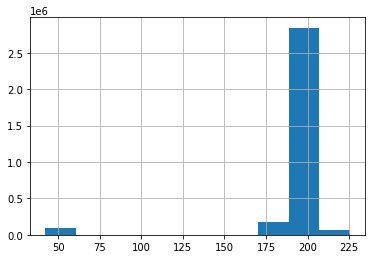

In [88]:
ads_data.ad_cost.hist()

**Конец лекции 5**